# Title of Assignment-2:
    Implementing Feedforward neural networks with Keras and TensorFlow
    a. Import the necessary packages
    b. Load the training and testing data (MNIST)
    c. Define the network architecture using Keras
    d. Train the model using SGD
    e. Evaluate the network
    f. Plot the training loss and accuracy


# Importing libraries

In [1]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Loading and preparing the data

MNIST stands for “Modified National Institute of Standards and Technology”. 
It is a dataset of 70,000 handwritten images. Each image is of 28x28 pixels 
i.e. about 784 features. Each feature represents only one pixel’s intensity i.e. from 0(white) to 255(black). 
This database is further divided into 60,000 training and 10,000 testing images.

In [5]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
#to see length of training dataset
len(x_train)

60000

In [9]:
##to see length of testing dataset
len(x_test)

10000

In [11]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [13]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [15]:

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

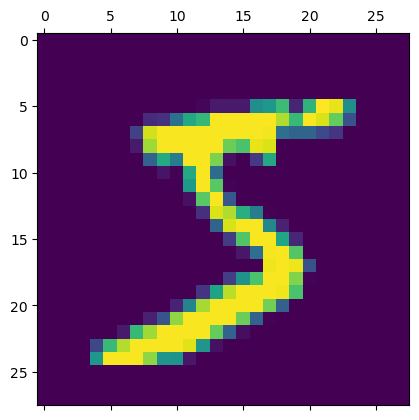

In [17]:
#to see how first image look
plt.matshow(x_train[0])

In [19]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [21]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
#Define the network architecture using Keras

# Creating the model


The ReLU function is one of the most popular activation functions. 
It stands for “rectified linear unit”. Mathematically this function is defined as:
y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if 
the input is positive.

The softmax function is another activation function. 
It changes input values into values that reach from 0 to 1.

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [32]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [35]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7298 - loss: 1.0415 - val_accuracy: 0.9028 - val_loss: 0.3538
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9005 - loss: 0.3563 - val_accuracy: 0.9190 - val_loss: 0.2915
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9155 - loss: 0.3002 - val_accuracy: 0.9261 - val_loss: 0.2615
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9236 - loss: 0.2706 - val_accuracy: 0.9328 - val_loss: 0.2419
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9305 - loss: 0.2419 - val_accuracy: 0.9351 - val_loss: 0.2260
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9367 - loss: 0.2256 - val_accuracy: 0.9406 - val_loss: 0.2080
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9403 - loss: 0.2095 - val_accuracy: 0.9449 - val_loss: 0.1924
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9462 - loss: 0.1928 - 

# Evaluate the model

In [38]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9454 - loss: 0.1889
Loss=0.164
Accuracy=0.953


# Making Prediction on New Data

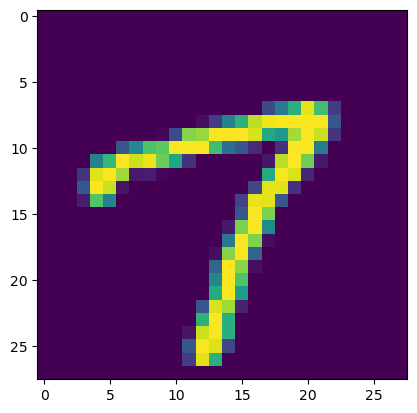

In [41]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [44]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Handwritten number in the image is= 7


# Plot graph for Accuracy and Loss

In [47]:
history.history??

Type:        dict
String form: {'accuracy': [0.8364999890327454, 0.9044166803359985, 0.9175333380699158, 0.9261999726295471, 0.9319999814033508, 0.9373833537101746, 0.9419833421707153, 0.9459499716758728, 0.9487500190734863, 0.9524499773979187], 'loss': [0.6516686081886292, 0.33892256021499634, 0.2906816303730011, 0.26143673062324524, 0.2389511615037918, 0.2207522690296173, 0.20498429238796234, 0.19134104251861572, 0.17980317771434784, 0.16895654797554016], 'val_accuracy': [0.9028000235557556, 0.9190000295639038, 0.9261000156402588, 0.9327999949455261, 0.9351000189781189, 0.9405999779701233, 0.9448999762535095, 0.9470999836921692, 0.9509999752044678, 0.9531999826431274], 'val_loss': [0.3538215756416321, 0.291526198387146, 0.2614940106868744, 0.24185466766357422, 0.22603002190589905, 0.2079833298921585, 0.19239680469036102, 0.1821824461221695, 0.1724402755498886, 0.1638365089893341]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized f

In [49]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

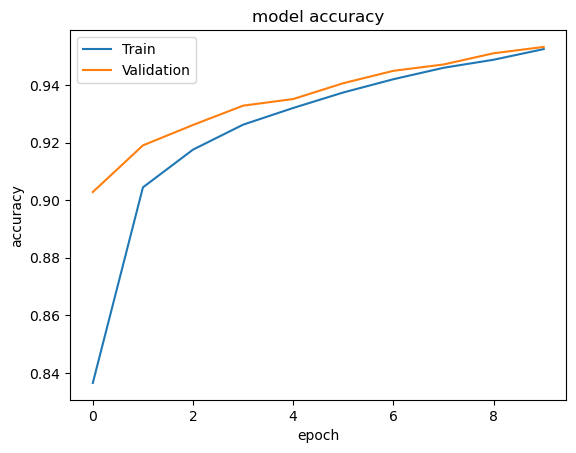

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

graph representing the model’s accuracy

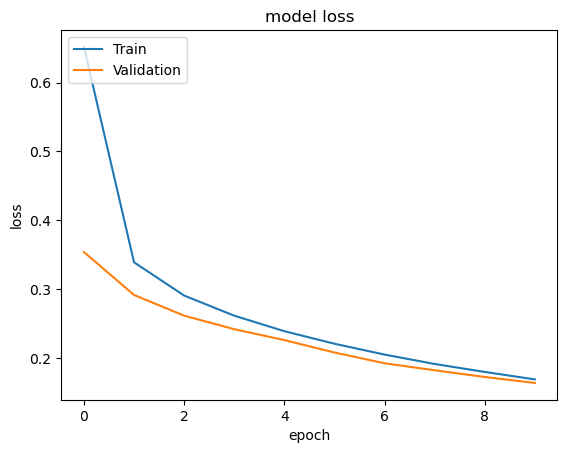

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

graph represents the model’s loss

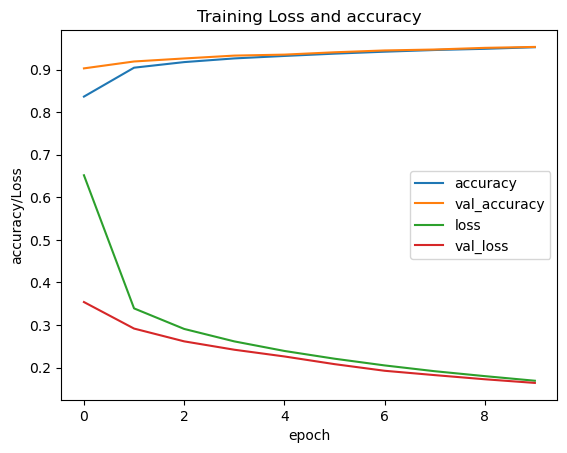

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

Conclusion: With above code We can see, that throughout the epochs, our model accuracy 
    increases and our model loss decreases,that is good since our model gains confidence
    with its predictions.
    
    1. The two losses (loss and val_loss) are decreasing and the accuracy 
       (accuracy and val_accuracy)are increasing. 
        So this indicates the model is trained in a good way.

    2. The val_accuracy is the measure of how good the predictions of your model are. 
       So In this case, it looks like the model is well trained after 10 epochs

In [60]:
#pwd

# Save the model